In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *


# If one HexGrid is good, Two has to be Better!

My idea was insipired by something I read. About how 2 sets of hexagons (overlapping) led to "Islamic" designs and dodecahedrons. 

## 1. Start with 2 HexGrids. Move the centers around to see what comes up
## 2. Try Overlaps with Hexgrids of FLAT and POINTY Topped

In [3]:
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = GREENS_HIGH_SAT + RED_BROWNS_HIGH_SAT


COL_SEQ = [#RED_BROWNS, 
           #GREENS, 
            BLACK_WHITES_LOW_SAT,
           BLUES, PINKS_LOW_SAT
            # GREENS, BROWNS]
            #           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]
            ]


#COL_SEQ = [mcolor_names]

COL1 = [RED_BROWNS, BLACK_WHITES_LOW_SAT,
           BLUES]# GREENS, BROWNS]
#           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]


COL2 = [mcolor_names]

# Color Sequences along X or Y or Z coords

1. We create a Hex Grid
2. We sort it by (say) Y coords
3. We traverse this new list of Hexagon (along increasing Y coord) and face-color it per predefined color sequence.

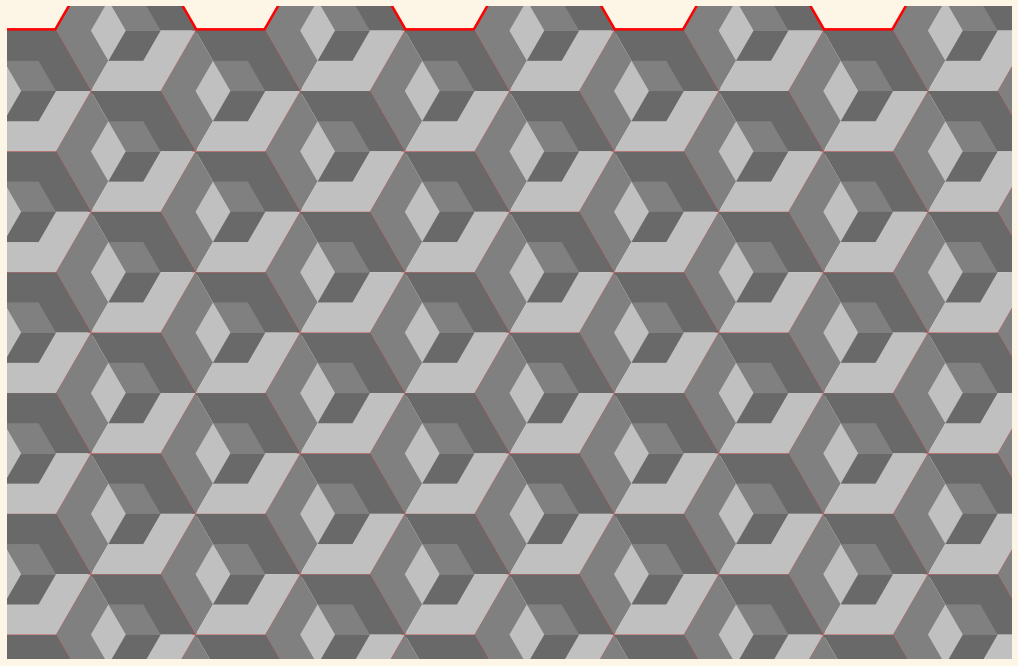

In [34]:
def main():
    nbk = 14
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = np.random.choice(YELLOWS_HIGH_SAT)
    bg_color = BEIGES[0]
    fc_bg = bg_color
    fig.patch.set_facecolor(bg_color)

    size=4
    num_rows, num_cols = 12, 9
    logging.info(f'num_rows {num_rows} num_cols {num_cols}, size {size}, bg {bg_color}')

    hg = HexGrid(num_rows, num_cols, size, flat=True)
    hg.render_grid(fc='none', color='r', lw=5)

    #Let's get hold of all the ORIGINAL Hex Centers...
    hx_centers = get_hexgrid_centers(hg)
    
    color_family = RED_BROWNS
    color_family = GREYS
    logging.info(f'Color_Family = {color_family}')
    vset = ((0,1,2), (2,3,4), (4,5,0))
    
    for h in hg.hlist:
        for cl in range(3):
            h.render_polygon(pt_list=vset[cl], include_center=True, fc=color_family[cl*3])

    for hc in hx_centers:
        h = Hex(*hc, size=size/2)
        for cl in range(3):
            h.render_polygon(pt_list=vset[cl], include_center=True, fc=color_family[((cl+1)%3)*3], zorder=2)
    
    
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.66
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip

    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    logging.info(f'x_range {x_range}, y_range {y_range}')
    pf.save_file(fig, 
                  f'MultipleGrids_matchingcenters',
                 nbk = 14, 
                 num_rows=num_rows, 
                 num_cols=num_cols, 
                )


    
    logging.info('Finished')

if __name__ == '__main__':
    main()


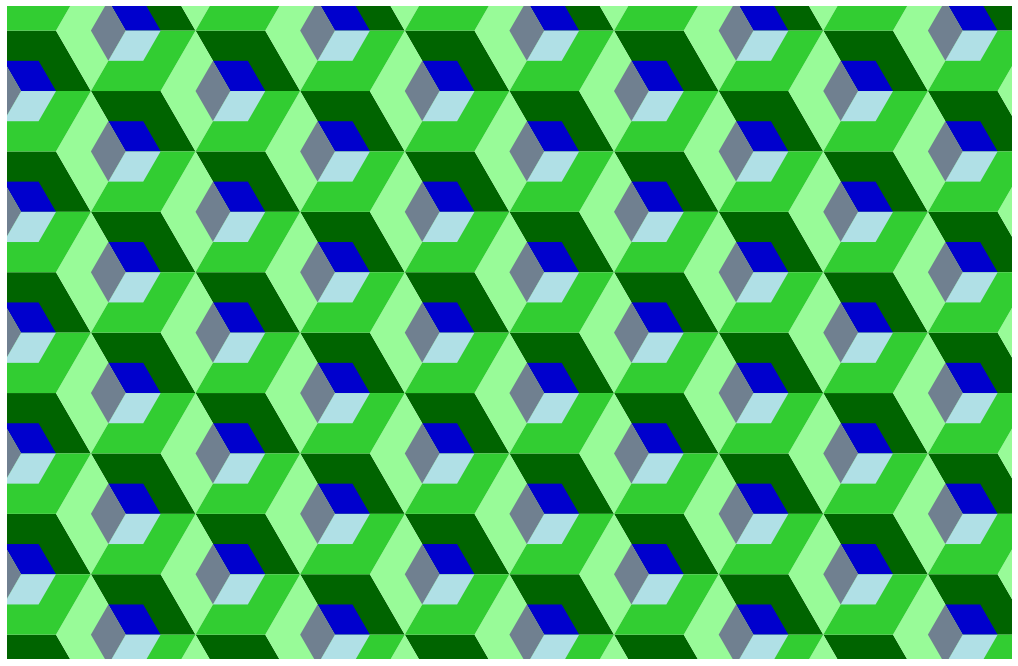

In [49]:
def draw_overlapping_grids(size, num_rows, 
                           num_cols,
                           color_family, color_family2,
                           bg_color='none'):
    
    nbk = 14
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))
    fig.patch.set_facecolor(bg_color)

    logging.info(f'num_rows {num_rows} num_cols {num_cols}, size {size}, bg {bg_color}')

    hg = HexGrid(num_rows, num_cols, size, flat=True)
#    hg.render_grid(fc='none', color='r', lw=5)

    #Let's get hold of all the ORIGINAL Hex Centers...
    hx_centers = get_hexgrid_centers(hg)
    
    logging.info(f'Color_Family = {color_family} Second color Famil {color_family2}')
    vset = ((0,1,2), (2,3,4), (4,5,0))
    
    for h in hg.hlist:
        h.render_polygon(pt_list=vset[0], include_center=True, fc=color_family[0])
        h.render_polygon(pt_list=vset[1], include_center=True, fc=color_family[len(color_family)//2])
        h.render_polygon(pt_list=vset[2], include_center=True, fc=color_family[-1])

    for hc in hx_centers:
        h = Hex(*hc, size=size/2)
        h.render_polygon(pt_list=vset[0], include_center=True, fc=color_family2[-1])
        h.render_polygon(pt_list=vset[1], include_center=True, fc=color_family2[len(color_family2)//2])
        h.render_polygon(pt_list=vset[2], include_center=True, fc=color_family2[0])
        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.66
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip

    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    logging.info(f'x_range {x_range}, y_range {y_range}')
    pf.save_file(fig, 
                  f'MultipleGrids_matchingcenters',
                 nbk = 14, 
                 num_rows=num_rows, 
                 num_cols=num_cols, 
                )


    
    logging.info('Finished')

if __name__ == '__main__':
    
    size=4
    num_rows, num_cols = 13, 9
    color_family = RED_BROWNS
    color_family = get_rnd_color_family()
    color_family2 = get_rnd_color_family()

    draw_overlapping_grids(size, num_rows, num_cols, color_family, color_family2)


In [40]:
7//2

3

(-53.51051177665153, 79.51051177665153, -19.815252187363008, 23.27935380250076)

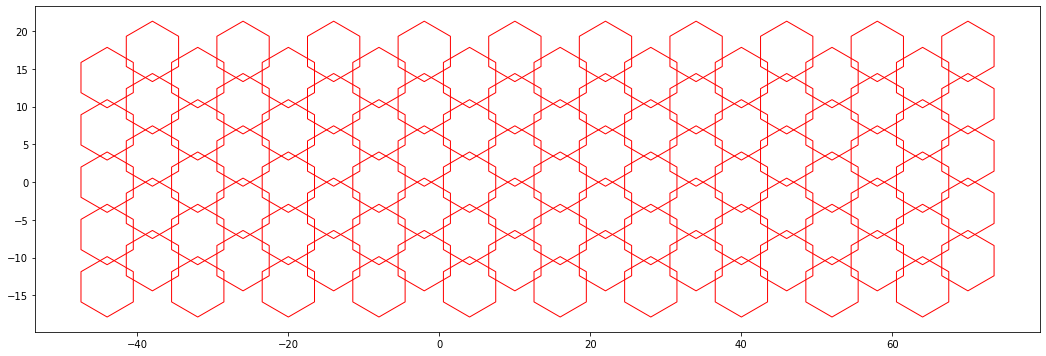

In [31]:
size=4
num_rows, num_cols = 10, 10
fig, ax = plt.subplots(figsize=(18,12))

hg = HexGrid(num_rows, num_cols, size, flat=True)

hx_centers = get_hexgrid_centers(hg)

for hc in hx_centers:
    h = Hex(*hc, size=4, flat=False)
    h.render(fc='none', color='r')
    
plt.axis('scaled')

In [42]:
h.render_polygon??